## Figure 2


In [1]:
### Start by initalizing what we need
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import requests
from io import StringIO

import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import math

In [2]:
input_path = 'C:\\Users\\fallest\\Google Drive\\Imperial Paper\\data\\'  ##change this to the path where the data is saved
#input_path = 'C:\\Users\\miste\\Google Drive\\Imperial Paper\\data\\'

Root_142 = pd.read_csv(input_path+'142_lifematrix_clean_feb1.txt')
Root_147 = pd.read_csv(input_path+'147_lifematrix_clean_feb1.txt')
Root_182 = pd.read_csv(input_path+'182_lifematrix_clean_feb1.txt')
Root_192 = pd.read_csv(input_path+'192_lifematrix_clean_feb1.txt')
Root_200 = pd.read_csv(input_path+'200_lifematrix_clean_feb1.txt')
Root_208 = pd.read_csv(input_path+'208_lifematrix_clean_feb1.txt')
Root_218 = pd.read_csv(input_path+'218_lifematrix_clean_feb1.txt')
Root_219 = pd.read_csv(input_path+'219_lifematrix_clean_feb1.txt')

In [3]:
# Added index for each cut root
Root_182.columns=np.arange(1,len(Root_182.loc[0])+1)
Root_192.columns=np.arange(1,len(Root_192.loc[0])+1)
Root_200.columns=np.arange(1,len(Root_200.loc[0])+1)
Root_208.columns=np.arange(1,len(Root_208.loc[0])+1)

# Added index for each uncut root
Root_142.columns=np.arange(1,len(Root_142.loc[0])+1)
Root_147.columns=np.arange(1,len(Root_147.loc[0])+1)
Root_218.columns=np.arange(1,len(Root_218.loc[0])+1)
Root_219.columns=np.arange(1,len(Root_219.loc[0])+1)

In [4]:
def time_formatter(root_data):
    root_data_frame = root_data.sum(axis=1, skipna=False).fillna(method='pad').to_frame()
    root_data_frame = root_data_frame.rename(columns = {0:'Events'})
    root_data_frame['Time'] = np.arange(0, len(root_data_frame))*0.25
    return root_data_frame

In [5]:
# Generate timeseries of event for each cut root from life-matrix
Timeseries_root_182=time_formatter(Root_182)
Timeseries_root_192=time_formatter(Root_192)
Timeseries_root_200=time_formatter(Root_200)
Timeseries_root_208=time_formatter(Root_208)

# Generate timeseries of event for each uncut root from life-matrix
Timeseries_root_142=time_formatter(Root_142)
Timeseries_root_147=time_formatter(Root_147)
Timeseries_root_218=time_formatter(Root_218)
Timeseries_root_219=time_formatter(Root_219)

In [6]:
# Generate timeseries of event for each cut root from life-matrix
events_182 = Timeseries_root_182
events_192 = Timeseries_root_192
events_200 = Timeseries_root_200
events_208 = Timeseries_root_208

events_cut = pd.concat([events_182 , events_192, events_200,events_208])

# Generate timeseries of event for each uncut root from life-matrix
events_142 = Timeseries_root_142
events_147 = Timeseries_root_147
events_218 = Timeseries_root_218
events_219 = Timeseries_root_219

#bursts_uncut= np.hstack((bursts_142,bursts_147,bursts_218,bursts_219))
events_uncut= pd.concat([events_142,events_147,events_218,events_219])

## Now get started on the actual figure

In [7]:
##Compute mean for cut and uncut
uncut_mean_events = events_uncut.mean()
cut_mean_events = events_cut.mean()
uncut_std = events_cut.std()
cut_std = events_uncut.std()
print('There are on average ',uncut_mean_events, ' events per frame in the uncut root and ', cut_mean_events, 'events per frame in cut roots')
print('The standard deviation of events in the uncut root is: ',uncut_std)
print('The standard deviation of events in the cut root is: ',cut_std)

There are on average  Events     5.794280
Time      65.046538
dtype: float64  events per frame in the uncut root and  Events     5.840282
Time      54.196712
dtype: float64 events per frame in cut roots
The standard deviation of events in the uncut root is:  Events     5.160216
Time      32.570938
dtype: float64
The standard deviation of events in the cut root is:  Events     5.793712
Time      41.077505
dtype: float64


In [8]:
## Get the sigma value for what we define as the cutoff for a burst
#Find the burst condition for cut and uncut.  The value epsilon is the mean+std deviation

epsilon_uncut = uncut_mean_events + uncut_std
epsilon_cut = cut_mean_events+cut_std
print('Epsilon for uncut is: ', epsilon_uncut)
print('Epsilon for cut is:', epsilon_cut)

print('Uncut bursts are greater than',uncut_mean_events + epsilon_uncut)
print('Cut bursts are greater than',cut_mean_events + epsilon_uncut)

Epsilon for uncut is:  Events    10.954495
Time      97.617476
dtype: float64
Epsilon for cut is: Events    11.633994
Time      95.274216
dtype: float64
Uncut bursts are greater than Events     16.748775
Time      162.664014
dtype: float64
Cut bursts are greater than Events     16.794777
Time      151.814188
dtype: float64


In [9]:
events_uncut.head()

,Events,Time
0,20.0,0.00
1,22.0,0.25
2,20.0,0.50
3,14.0,0.75
4,12.0,1.00


In [10]:
epsilon_uncut = epsilon_uncut[0]
epsilon_cut = epsilon_cut[0]

In [11]:
epsilon_uncut

10.954495491643026

In [12]:
epsilon_cut

11.63399360010465

In [13]:
bursts_uncut = events_uncut[events_uncut['Events'] > epsilon_uncut]

In [14]:
bursts_cut = events_cut[events_cut['Events'] > epsilon_cut]

C:\Users\fallest\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\fallest\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\fallest\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarni

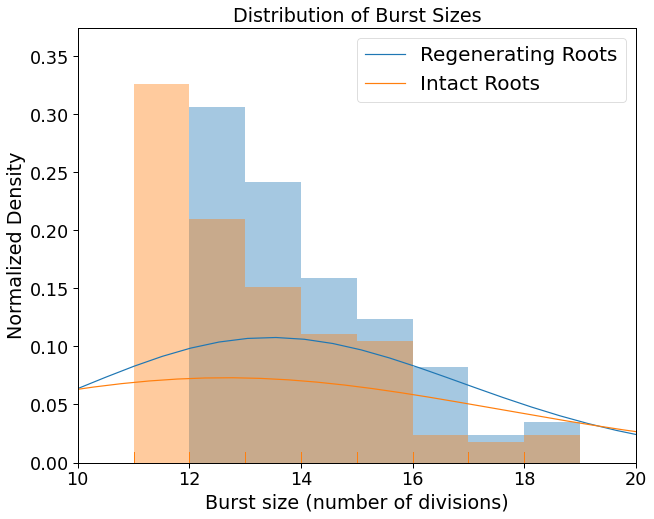

In [15]:
new_bins = list(range(10,23,1))

sns.set_context("paper", font_scale=2)  
sns_fig = plt.figure(num=None, figsize=(10, 8))  #set figure size
ax_sns = sns.distplot(bursts_cut['Events'], bins=new_bins,kde=True, rug=True)  #do a kernel density estimation
sns.distplot(bursts_uncut['Events'],bins=new_bins, kde=True, rug=True, ax=ax_sns)   #add second axis to the plot
ax_sns.set(xlabel = 'Burst size (number of divisions)', ylabel='Normalized Density', title='Distribution of Burst Sizes', xlim=(10,20)) #set the labels
ax_sns.legend(labels = ['Regenerating Roots', 'Intact Roots'], fontsize=20) #set the legend

sns_fig.savefig('figure_2_Feb_2022.png', facecolor='w', edgecolor='w')
sns_fig.savefig('figure_2_Feb_2022.pdf', facecolor='w', edgecolor='w')



In [16]:
 kids  = ax_sns.get_children()
kids

 Text(0.5, 1.0, 'Distribution of Burst Sizes'),
 Text(0.0, 1.0, ''),
 Text(1.0, 1.0, ''),

In [17]:
bar_blue = kids[2]
new_blue = bar_blue.get_facecolor()

bar_orange =kids[18]
new_orange = bar_orange.get_facecolor()
print(new_orange)
print(new_blue)

(1.0, 0.4980392156862745, 0.054901960784313725, 0.4)
(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 0.4)


In [18]:
from scipy import stats
stats.ks_2samp(bursts_cut['Events'], bursts_uncut['Events'])
#if the p value is below 1%, we assume the two populations are not taken from the same distribution
## or is the error bar too small

Ks_2sampResult(statistic=0.2994652406417112, pvalue=9.721634453008221e-08)

## Plotting a poisson distribution

In [19]:
#let's try the poisson statistics
from scipy.stats import poisson
mu_cut = bursts_cut['Events'].mean()
mu_uncut = bursts_uncut['Events'].mean()
n_cut = len(bursts_cut)
n_uncut = len(bursts_uncut)
bins = np.array(new_bins)
binwidth=1

C:\Users\fallest\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\fallest\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


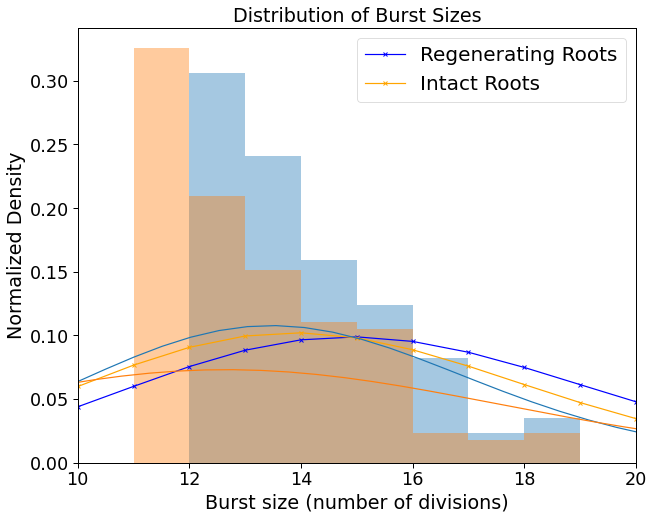

In [43]:
n_cut=1  #normalize to one
n_uncut=1
sns.set_context("paper", font_scale=2)  
sns_fig = plt.figure(num=None, figsize=(10, 8))  #set figure size
plt.plot(bins, n_uncut*(poisson.cdf(bins+binwidth,mu_uncut) - poisson.cdf(bins,mu_uncut)), 'bx-')
plt.plot(bins, n_cut*(poisson.cdf(bins+binwidth,mu_cut) - poisson.cdf(bins,mu_cut)), 'x-', color='orange')

ax_sns = sns.distplot(bursts_cut['Events'], bins=new_bins,kde=True, rug=False)  #do a kernel density estimation
sns.distplot(bursts_uncut['Events'],bins=new_bins, kde=True, rug=False, ax=ax_sns)   #add second axis to the plot
ax_sns.set(xlabel = 'Burst size (number of divisions)', ylabel='Normalized Density', title='Distribution of Burst Sizes', xlim=(10,20)) #set the labels
ax_sns.legend(labels = ['Regenerating Roots', 'Intact Roots'], fontsize=20) #set the legend



### Try to plot a poisson distribution
$P = \frac{\lambda^k exp^{-\lambda}}{k!}$

lambda = max for the intact roots

k = center of bin, or left side

In [21]:
ks = list(range(5, 21))
lam_cut=13
lam_uncut=12

In [22]:
Poissons_uncut = []
Poissons_cut = []
for k in ks:
    P_uncut = ((lam_uncut**k)*(np.exp(-lam_uncut)))/math.factorial(k)
    P_cut = ((lam_cut**k)*(np.exp(-lam_cut)))/math.factorial(k)
    Poissons_uncut.append(P_uncut)
    Poissons_cut.append(P_cut)

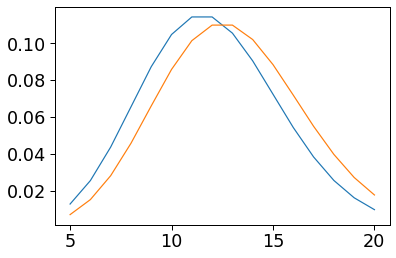

In [23]:
plt.plot(ks, Poissons_uncut)
plt.plot(ks, Poissons_cut)

C:\Users\fallest\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\fallest\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


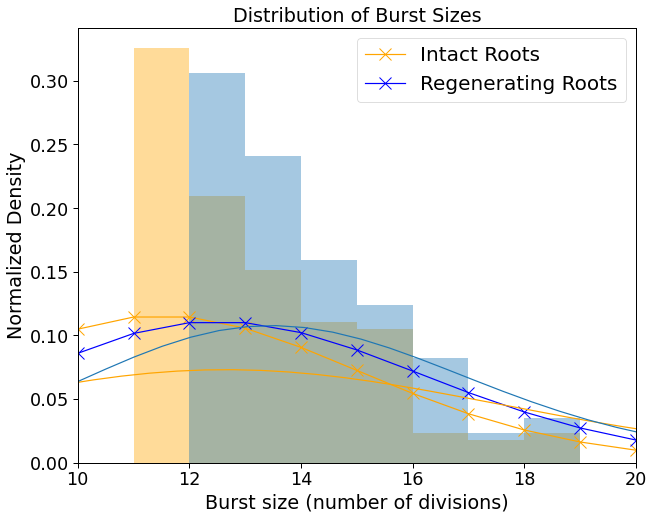

In [24]:
n_cut=1  #normalize to one
n_uncut=1
sns.set_context("paper", font_scale=2)  
sns_fig = plt.figure(num=None, figsize=(10, 8))  #set figure size
plt.plot(ks, Poissons_uncut, 'x-', color='orange', markersize='12')

plt.plot(ks, Poissons_cut, 'bx-', markersize='12')

ax_sns = sns.distplot(bursts_uncut['Events'], bins=new_bins,kde=True, rug=False ,color='orange')  #do a kernel density estimation
sns.distplot(bursts_cut['Events'],bins=new_bins, kde=True, rug=False, ax=ax_sns)   #add second axis to the plot
ax_sns.set(xlabel = 'Burst size (number of divisions)', ylabel='Normalized Density', title='Distribution of Burst Sizes', xlim=(10,20)) #set the labels
ax_sns.legend(labels = ['Intact Roots', 'Regenerating Roots'], fontsize=20) #set the legend

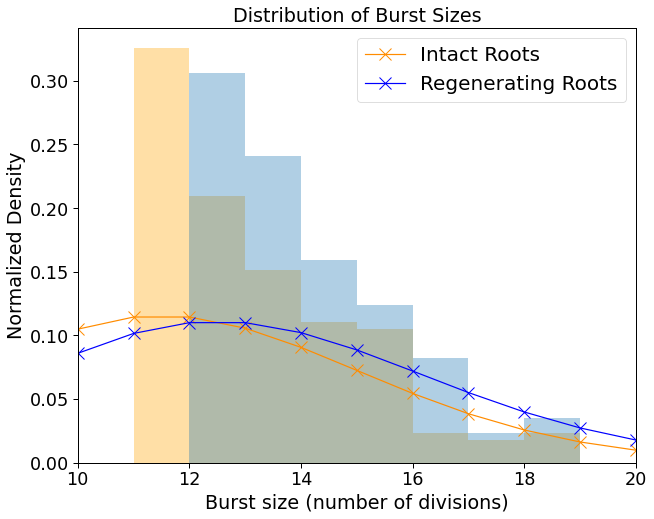

In [44]:
n_cut=1  #normalize to one
n_uncut=1

sns.set_context("paper", font_scale=2)  

sns_fig = plt.figure(num=None, figsize=(10, 8))  #set figure size
plt.plot(ks, Poissons_uncut, 'x-', color='darkorange', markersize='12')
plt.plot(ks, Poissons_cut, 'bx-', markersize='12')

ax_sns = sns.histplot(bursts_uncut['Events'], bins=new_bins,kde=False, stat='density', color='orange', alpha=0.35, edgecolor='none')  #do a kernel density estimation
sns.histplot(bursts_cut['Events'],bins=new_bins, kde=False,stat='density', ax=ax_sns, color=new_blue, alpha=0.35,edgecolor='none')
#add second axis to the plot
ax_sns.set(xlabel = 'Burst size (number of divisions)', ylabel='Normalized Density', title='Distribution of Burst Sizes', xlim=(10,20)) #set the labels
ax_sns.legend(labels = ['Intact Roots', 'Regenerating Roots'], fontsize=20) #set the legend

In [26]:
sns_fig.savefig('figure_2_Jan_25_2023.png', facecolor='w', edgecolor='w')
sns_fig.savefig('figure_2_Jan_25_2023.pdf', facecolor='w', edgecolor='w')

In [ ]:
sns.__version__

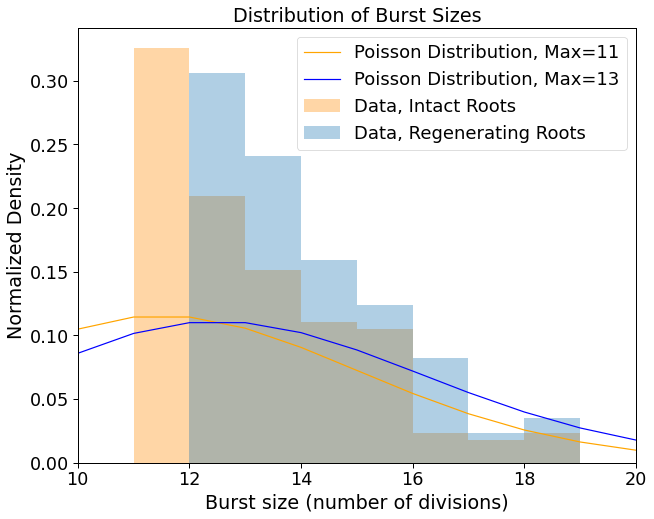

In [45]:
#https://stackoverflow.com/questions/42767489/add-legend-to-seaborn-point-plotax.get_legend().set_frame_on(False)

n_cut=1  #normalize to one
n_uncut=1

sns.set_context("paper", font_scale=2)  

sns_fig = plt.figure(num=None, figsize=(10, 8))  #set figure size
plt.plot(ks, Poissons_uncut, '-', color='orange', markersize='12')
plt.plot(ks, Poissons_cut, 'b-', markersize='12')

ax_sns = sns.histplot(bursts_uncut['Events'], bins=new_bins,kde=False, stat='density', color='darkorange', alpha=0.35, edgecolor='none')  #do a kernel density estimation
sns.histplot(bursts_cut['Events'],bins=new_bins, kde=False,stat='density', ax=ax_sns, color=new_blue, alpha=0.35,edgecolor='none')
#add second axis to the plot
ax_sns.set(xlabel = 'Burst size (number of divisions)', ylabel='Normalized Density', title='Distribution of Burst Sizes', xlim=(10,20)) #set the labels
ax_sns.legend(labels = ['Poisson Distribution, Max=11', 'Poisson Distribution, Max=13', 'Data, Intact Roots', 'Data, Regenerating Roots'], fontsize=18) #set the legend



In [46]:
sns_fig.savefig('figure_2_Jul_4_2023.png', facecolor='w', edgecolor='w')
sns_fig.savefig('figure_2_Jul_4_2023.pdf', facecolor='w', edgecolor='w')